<a href="https://colab.research.google.com/github/Rabittitan/MC-Team7/blob/main/Nh%C3%B3m_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Khai Báo Thư Viện


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



# Thông Tin Dữ liệu

## Truyền Vào Tệp Dữ Liệu

In [ ]:
df = pd.read_csv("/content/sample_data/spotify_songs.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Kiểm Tra Dữ Liệu và Làm Sạch

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [ ]:
#xu ly du lieu null
df_cleaned = df.dropna()

print(df_cleaned.isnull().sum())

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


**Dưới đây là danh sách tất cả các đặc trưng khác nhau của âm nhạc:**







**track_id:** ID duy nhất của bài hát

**track_name:** Tên bài hát

**track_artist:** Nghệ sĩ thực hiện bài hát

**lyrics:** Lời bài hát

**track_popularity:** Mức độ phổ biến của bài hát (0-100) nơi mức cao hơn là tốt hơn

**track_album_id:** ID duy nhất của album

**track_album_name:** Tên album của bài hát

**track_album_release_date:** Ngày phát hành album

**playlist_name:** Tên của danh sách phát

**playlist_id:** ID của danh sách phát

**playlist_genre:** Thể loại của danh sách phát

**playlist_subgenre:**  Thể loại phụ của danh sách phát

**danceability:** Mức độ phù hợp để nhảy dựa trên sự kết hợp của các yếu tố âm nhạc bao gồm tempo, ổn định nhịp điệu, độ mạnh của nhịp đập và sự đều đặn tổng thể. Giá trị 0.0 là ít phù hợp nhất để nhảy và 1.0 là phù hợp nhất để nhảy.

**energy:** Một thước đo từ 0.0 đến 1.0 và đại diện cho một thước đo nhận thức về cường độ và hoạt động. Thông thường, các bản nhạc năng lượng cao cảm thấy nhanh, to và ồn ào. Ví dụ, death metal có năng lượng cao, trong khi một bản prelude của Bach có điểm thấp trên thang đo. Các đặc trưng nhận thức đóng góp vào thuộc tính này bao gồm phạm vi động, độ to perceived, màu sắc, tỷ lệ bắt đầu và entropy tổng thể.

**key:** Tổng số khóa được ước lượng của bài hát. Số nguyên ánh xạ đến các nốt nhạc bằng cách sử dụng ký hiệu Pitch Class chuẩn. Ví dụ: 0 = C, 1 = C♯/D♭, 2 = D, v.v. Nếu không có khóa nào được phát hiện, giá trị là -1.
**loudness:** Độ to của bài hát tổng thể tính bằng decibels (dB). Các giá trị độ to được lấy trung bình trên toàn bộ bài hát và hữu ích để so sánh độ to tương đối của các bài hát. Độ to là chất lượng của âm thanh là yếu tố tâm lý chính của sức mạnh vật lý (biên độ). Các giá trị thường nằm trong khoảng từ -60 đến 0 db.

**mode:** Chế độ chỉ ra tính chất (major hoặc minor) của một bài hát, loại thang mà nội dung giai điệu của nó được tạo ra. Major được biểu diễn bằng 1 và minor là 0.

**speechiness:** Speechiness phát hiện sự hiện diện của các từ nói trong một bài hát. Càng nhiều bản ghi giống như lời nói độc quyền (ví dụ: talk show, sách nói, thơ), giá trị thuộc tính càng gần 1.0. Các giá trị trên 0.66 mô tả các bài hát có thể hoàn toàn được tạo ra từ các từ nói. Các giá trị giữa 0.33 và 0.66 mô tả các bài hát có thể chứa cả âm nhạc và lời nói, hoặc trong các phần hoặc lớp, bao gồm các trường hợp như âm nhạc rap. Các giá trị dưới 0.33 rất có thể đại diện cho âm nhạc và các bài hát không giống lời nói khác.

**acousticness:** Một thước đo tự tin từ 0.0 đến 1.0 về việc bài hát có phải là acoustic hay không. 1.0 đại diện cho sự tự tin cao bài hát là acoustic.

**instrumentalness:** Dự đoán liệu một bài hát có chứa giọng hát hay không. “Ooh” và “aah” được coi là nhạc cụ trong ngữ cảnh này. Các bài hát rap hoặc lời nói rõ ràng là “vocal”. Giá trị instrumentalness càng gần 1.0, khả năng bài hát không chứa nội dung giọng hát càng lớn. Các giá trị trên 0.5 được dự định để đại diện cho các bài hát nhạc cụ, nhưng sự tự tin cao hơn khi giá trị tiếp cận 1.0.
liveness: Phát hiện sự hiện diện của khán giả trong bản ghi. Các giá trị liveness cao hơn đại diện cho xác suất tăng bài hát được biểu diễn trực tiếp. Một giá trị trên 0.8 cung cấp khả năng mạnh mẽ rằng bài hát được biểu diễn trực tiếp.

**valence:** Một thước đo từ 0.0 đến 1.0 mô tả sự tích cực âm nhạc được truyền đạt bởi một bài hát. Các bài hát có valence cao nghe có vẻ tích cực hơn (ví dụ: vui vẻ, phấn khích, hạnh phúc), trong khi các bài hát có valence thấp nghe có vẻ tiêu cực hơn (ví dụ: buồn, trầm cảm, tức giận).

**tempo: **Tổng số tempo ước lượng của một bài hát tính bằng nhịp mỗi phút (BPM). Trong thuật ngữ âm nhạc, tempo là tốc độ hoặc nhịp độ của một tác phẩm nhất định và trực tiếp bắt nguồn từ thời gian trung bình của nhịp đập.

**duration_ms:** Thời lượng của bài hát tính bằng mili giây

**language:** Ngôn ngữ của lời bài hát

**Kiểm tra các giá trị unique**

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print("\n")

Unique values in playlist_genre:
[0 1 2 3 4 5]


Unique values in danceability:
[0.748  0.726  0.675  0.718  0.65   0.449  0.542  0.594  0.642  0.679
 0.437  0.744  0.572  0.69   0.805  0.694  0.678  0.746  0.467  0.708
 0.684  0.732  0.62   0.682  0.663  0.625  0.641  0.702  0.723  0.742
 0.716  0.816  0.633  0.563  0.728  0.846  0.693  0.67   0.755  0.622
 0.789  0.64   0.609  0.75   0.535  0.766  0.649  0.588  0.355  0.735
 0.752  0.607  0.714  0.775  0.814  0.784  0.367  0.591  0.59   0.791
 0.564  0.669  0.77   0.513  0.72   0.294  0.665  0.46   0.362  0.686
 0.618  0.661  0.571  0.652  0.706  0.404  0.876  0.802  0.906  0.753
 0.672  0.581  0.643  0.674  0.691  0.653  0.734  0.55   0.703  0.44
 0.547  0.673  0.699  0.647  0.655  0.79   0.611  0.619  0.575  0.768
 0.767  0.466  0.434  0.837  0.514  0.842  0.509  0.737  0.584  0.743
 0.721  0.781  0.57   0.551  0.617  0.503  0.658  0.713  0.596  0.654
 0.63   0.532  0.604  0.432  0.638  0.759  0.614  0.851  0.738  0.945
 0.704  0.7

In [ ]:
# Xóa các cột cụ không cần thiết cho mô hình đánh giá trực tiếp trên df
columns_to_drop = ['track_id','playlist_name','playlist_subgenre' ,'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_id']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Kiểm tra lại dữ liệu sau khi xóa các cột
df.head()


,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
df['playlist_genre'].value_counts()

edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: playlist_genre, dtype: int64

chọn playlist_genre là target vì vậy cần phải chuyển string sang int

---

thực hiện việc ánh xạ (mapping) giữa các giá trị chuỗi trong cột 'playlist_genre' của DataFrame (df) và các giá trị số tương ứng theo một bảng ánh xạ được định nghĩa trước đó


In [ ]:
 # Định nghĩa mapping giữa chuỗi và số
genre_mapping = {'pop': 0, 'rap': 1, 'rock': 2, 'latin': 3, 'r&b': 4, 'edm': 5}

# Áp dụng map cho cột 'playlist_genre'
df['playlist_genre'] = df['playlist_genre'].map(genre_mapping)

# Kiểm tra lại kiểu dữ liệu
print(df['playlist_genre'].dtype)


int64


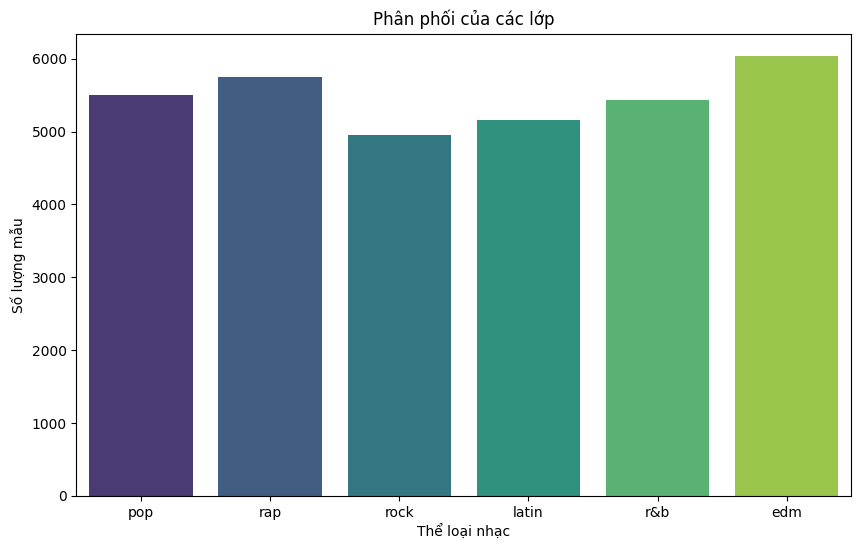

In [ ]:

# Kiểm tra sự đồng đều dữ liệu
plt.figure(figsize=(10, 6))
sns.countplot(x='playlist_genre', data=df, palette='viridis')

# Thêm tên thể loại vào biểu đồ
plt.title('Phân phối của các lớp')
plt.xlabel('Thể loại nhạc')
plt.ylabel('Số lượng mẫu')

# Lấy tên thể loại từ từ điển ngược lại
genre_reverse_mapping = {v: k for k, v in genre_mapping.items()}
labels = [genre_reverse_mapping[i] for i in range(len(genre_mapping))]

# Hiển thị tên thể loại trên trục x
plt.xticks(ticks=range(len(genre_mapping)), labels=labels)
plt.show()

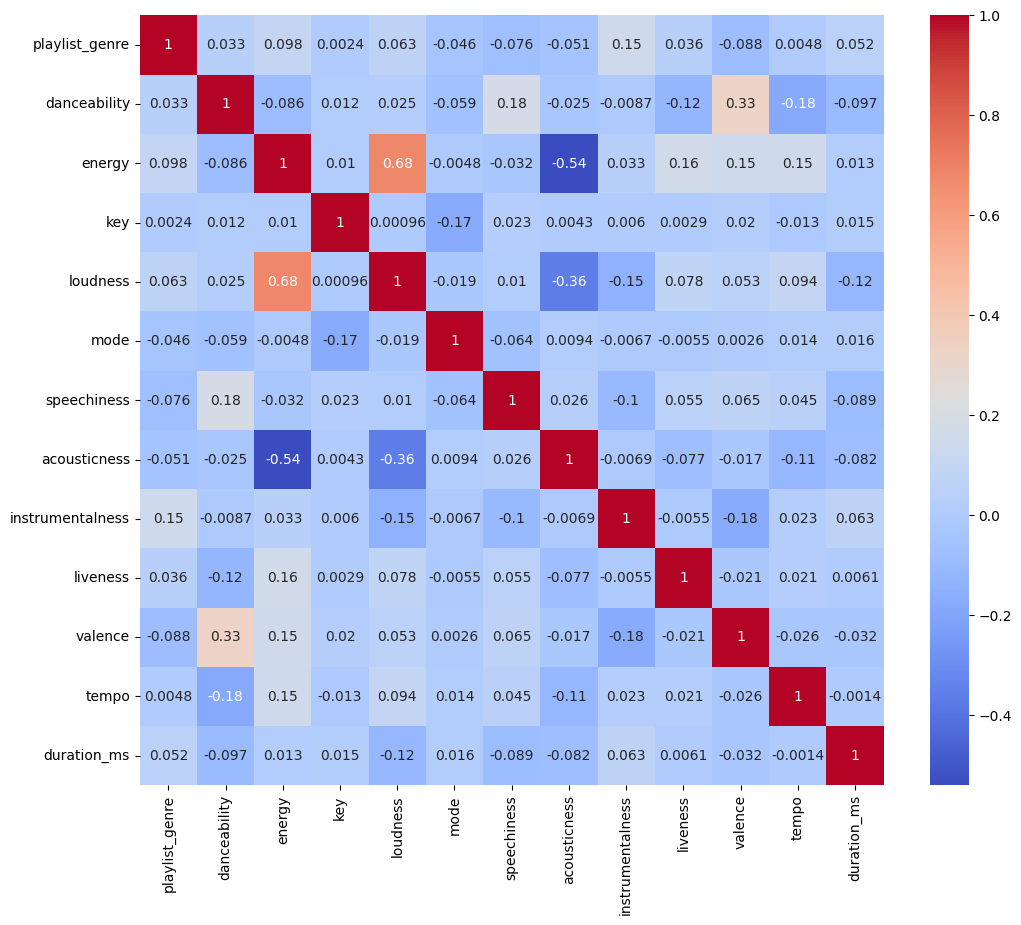

In [ ]:
# thể hiện sự tương quan của genre với các thuộc tính khác
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Mô Hình Học Máy

## Chuẩn Bị Dữ Liệu Cho Mô Hình

In [ ]:

X = df.drop('playlist_genre', axis=1)
y = df['playlist_genre']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Chuẩn hóa dữ liệu nếu cần
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Mô Hình RandomForest


In [ ]:

# Tạo mô hình RandomForestClassifier với số lượng cây là 100
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
RF_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = RF_model.predict(X_test_scaled)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Random Forest Accuracy: {accuracy}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix}')
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.5548956905740825
Random Forest Confusion Matrix:
[[353  71 161 149 154 193]
 [ 58 754  39  99 139  79]
 [ 83  18 781  21  94  39]
 [174 164  59 427 107 102]
 [131 209  83  81 491  36]
 [181  61  33  70  35 838]]
              precision    recall  f1-score   support

           0       0.36      0.33      0.34      1081
           1       0.59      0.65      0.62      1168
           2       0.68      0.75      0.71      1036
           3       0.50      0.41      0.45      1033
           4       0.48      0.48      0.48      1031
           5       0.65      0.69      0.67      1218

    accuracy                           0.55      6567
   macro avg       0.54      0.55      0.55      6567
weighted avg       0.55      0.55      0.55      6567



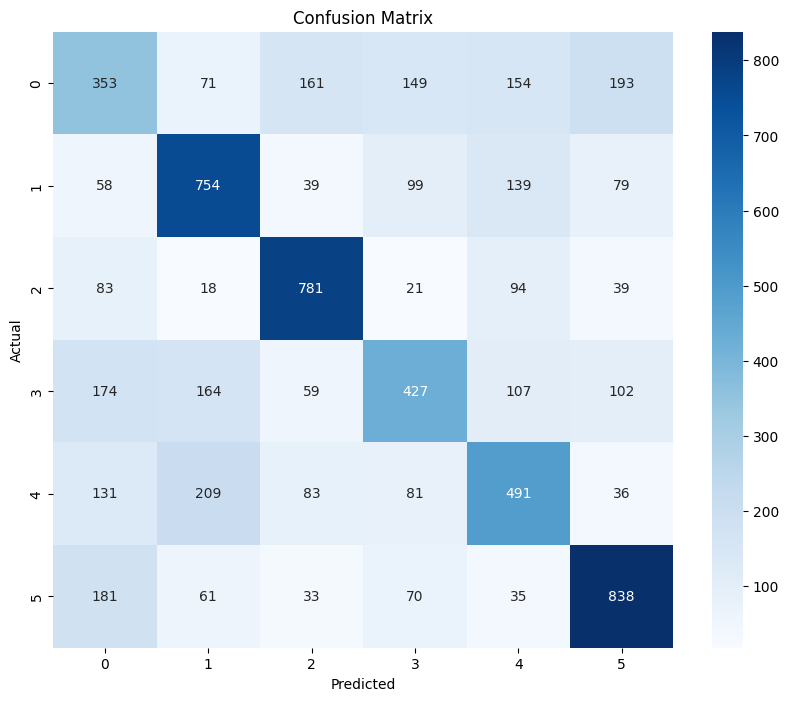

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Mô Hình Decision Tree

In [ ]:
# Xây dựng và huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Đánh giá mô hình Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree Confusion Matrix:\n{dt_conf_matrix}')

Decision Tree Accuracy: 0.44510430942591744
Decision Tree Confusion Matrix:
[[368  97 138 179 133 166]
 [137 541  38 165 194  93]
 [167  42 611  51  97  68]
 [222 155  67 362 124 103]
 [201 198  97 111 371  53]
 [227  96  54 109  62 670]]


## Mô Hình Gradient Boosting

In [ ]:
# Huấn luyện mô hình Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

print(f'Gradient Boosting Accuracy: {gb_accuracy}')
print(f'Gradient Boosting Confusion Matrix:\n{gb_conf_matrix}')

Gradient Boosting Accuracy: 0.5370793360743109
Gradient Boosting Confusion Matrix:
[[372  80 163 133 153 180]
 [ 71 740  32 111 140  74]
 [120  11 708  35 111  51]
 [180 171  64 401 118  99]
 [112 223  85 111 463  37]
 [183  59  33  64  36 843]]


## Mô Hình Logistic Regression

In [ ]:
# Huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Dự đoán với mô hình Logistic Regression
logistic_pred = logistic_model.predict(X_test_scaled)

# Đánh giá mô hình Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_conf_matrix = confusion_matrix(y_test, logistic_pred)

print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'Logistic Regression Confusion Matrix:\n{logistic_conf_matrix}')

Logistic Regression Accuracy: 0.4630729404598751
Logistic Regression Confusion Matrix:
[[267  86 194 163 145 226]
 [ 66 600  43 148 147 164]
 [ 67   9 674  49 111 126]
 [116 157 104 369 124 163]
 [103 201 131 142 391  63]
 [154  98  81 103  42 740]]


## So Sánh hiệu suất giữa các mô hình

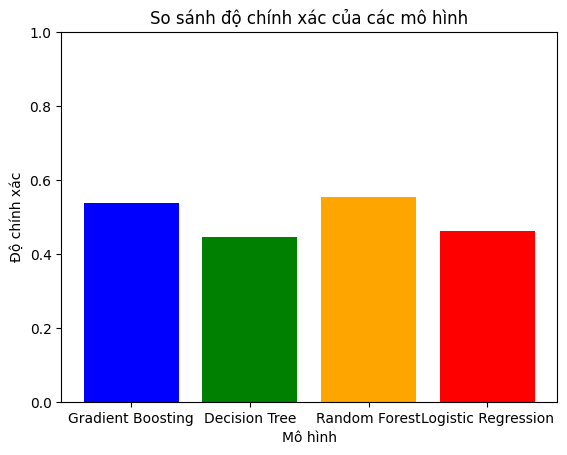

In [ ]:
# Độ chính xác của từng mô hình
accuracy_scores = [gb_accuracy, dt_accuracy, accuracy,logistic_accuracy]

# Tên của từng mô hình
model_names = ['Gradient Boosting', 'Decision Tree', 'Random Forest','Logistic Regression']

# Vẽ biểu đồ cột
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange','red'])
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.title('So sánh độ chính xác của các mô hình')
plt.ylim(0, 1)  # Điều chỉnh phạm vi trục y nếu cần thiết
plt.show()


## Tối Ưu Hiệu suất

### Tối ưu RandomForest

In [ ]:
# Định nghĩa các giá trị cần thử nghiệm
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Tiến hành tìm kiếm trên tập huấn luyện
grid_search.fit(X_train_scaled, y_train)

# Lấy ra các tham số tối ưu
best_params = grid_search.best_params_

# In ra tham số tối ưu
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 30, 'n_estimators': 150}


In [ ]:
# Sử dụng tham số tối ưu từ GridSearch
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']

# Tạo mô hình Random Forest với tham số tối ưu
optimal_RF_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Huấn luyện lại mô hình trên tập huấn luyện
optimal_RF_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_optimal = optimal_RF_model.predict(X_test_scaled)

# Đánh giá mô hình với tham số tối ưu
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)

# In kết quả
print(f'Optimal Random Forest Accuracy: {accuracy_optimal}')
print(f'Optimal Random Forest Confusion Matrix:\n{conf_matrix_optimal}')
print(classification_report(y_test, y_pred_optimal))


Optimal Random Forest Accuracy: 0.557636668189432
Optimal Random Forest Confusion Matrix:
[[360  75 162 140 149 195]
 [ 58 742  42  98 152  76]
 [ 93  17 782  24  89  31]
 [170 165  60 434 104 100]
 [131 207  85  76 499  33]
 [173  60  39  64  37 845]]
              precision    recall  f1-score   support

           0       0.37      0.33      0.35      1081
           1       0.59      0.64      0.61      1168
           2       0.67      0.75      0.71      1036
           3       0.52      0.42      0.46      1033
           4       0.48      0.48      0.48      1031
           5       0.66      0.69      0.68      1218

    accuracy                           0.56      6567
   macro avg       0.55      0.55      0.55      6567
weighted avg       0.55      0.56      0.55      6567



### Tối ưu Decision Tree



In [ ]:
# Định nghĩa các giá trị cần thử nghiệm
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier()

# Sử dụng GridSearchCV để tìm siêu tham số tối ưu
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra các giá trị tối ưu
print("Best Parameters:", grid_search.best_params_)

# Huấn luyện mô hình với các giá trị tối ưu
optimal_dt_model = grid_search.best_estimator_
optimal_dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
optimal_dt_pred = optimal_dt_model.predict(X_test)

# Đánh giá mô hình Decision Tree tối ưu
optimal_dt_accuracy = accuracy_score(y_test, optimal_dt_pred)
optimal_dt_conf_matrix = confusion_matrix(y_test, optimal_dt_pred)

print(f'Optimal Decision Tree Accuracy: {optimal_dt_accuracy}')
print(f'Optimal Decision Tree Confusion Matrix:\n{optimal_dt_conf_matrix}')

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
Optimal Decision Tree Accuracy: 0.44967260545149995
Optimal Decision Tree Confusion Matrix:
[[374  98 169 141 130 169]
 [112 673  53 129 123  78]
 [178  27 606  34 114  77]
 [261 186  70 322 114  80]
 [174 262 113 122 317  43]
 [236  91  92  91  47 661]]


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


### Tối ưu Gradient Boosting

In [ ]:
aram_grid_gb = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

# Tạo mô hình Gradient Boosting
gb_model = GradientBoostingClassifier()

# Sử dụng GridSearchCV để tìm siêu tham số tối ưu
grid_search_gb = GridSearchCV(gb_model, aram_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# In ra các giá trị tối ưu
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Huấn luyện mô hình với các giá trị tối ưu
optimal_gb_model = grid_search_gb.best_estimator_
optimal_gb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
optimal_gb_pred = optimal_gb_model.predict(X_test)

# Đánh giá mô hình Gradient Boosting tối ưu
optimal_gb_accuracy = accuracy_score(y_test, optimal_gb_pred)
optimal_gb_conf_matrix = confusion_matrix(y_test, optimal_gb_pred)

print(f'Optimal Gradient Boosting Accuracy: {optimal_gb_accuracy}')
print(f'Optimal Gradient Boosting Confusion Matrix:\n{optimal_gb_conf_matrix}')

Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Optimal Gradient Boosting Accuracy: 0.4642911527333638
Optimal Gradient Boosting Confusion Matrix:
[[280 108 155 105 196 237]
 [ 69 697  62  99 153  88]
 [137  30 553  25 176 115]
 [199 199  64 302 123 146]
 [ 83 297  87 101 399  64]
 [142  91  76  45  46 818]]


### Tối ưu logistic Regression


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Định nghĩa mô hình Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Đặt các giá trị để thử nghiệm
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Sử dụng Grid Search để tìm kiếm giá trị tốt nhất cho các tham số
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# In ra giá trị tốt nhất và tham số tương ứng
print("Best Parameters:", grid_search.best_params_)

# Dự đoán với mô hình đã được tối ưu hóa
logistic_optimized_model = grid_search.best_estimator_
logistic_optimized_pred = logistic_optimized_model.predict(X_test_scaled)

# Đánh giá mô hình đã được tối ưu hóa
logistic_optimized_accuracy = accuracy_score(y_test, logistic_optimized_pred)
logistic_optimized_conf_matrix = confusion_matrix(y_test, logistic_optimized_pred)

print(f'Optimized Logistic Regression Accuracy: {logistic_optimized_accuracy}')
print(f'Optimized Logistic Regression Confusion Matrix:\n{logistic_optimized_conf_matrix}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Parameters: {'C': 1, 'penalty': 'l2'}
Optimized Logistic Regression Accuracy: 0.4630729404598751
Optimized Logistic Regression Confusion Matrix:
[[267  86 194 163 145 226]
 [ 66 600  43 148 147 164]
 [ 67   9 674  49 111 126]
 [116 157 104 369 124 163]
 [103 201 131 142 391  63]
 [154  98  81 103  42 740]]


## So sánh hiệu suất của các mô hình sau khi tối ưu

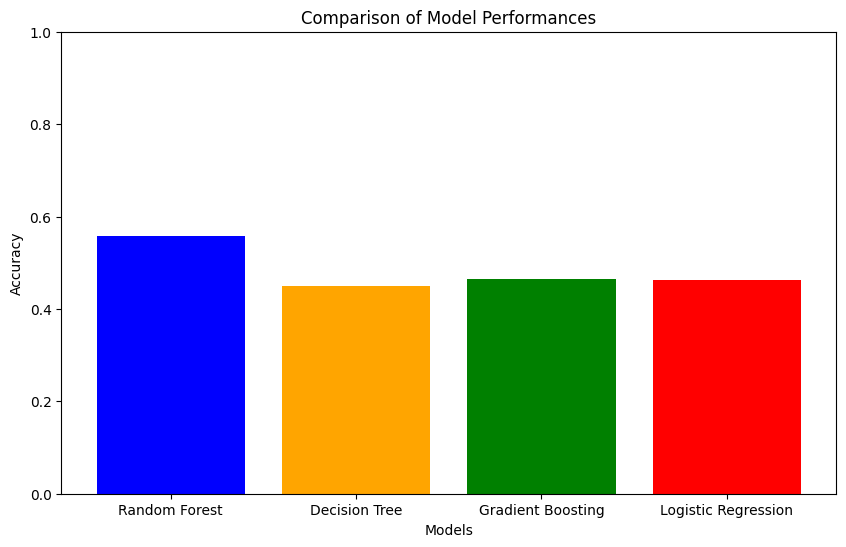

In [ ]:
# Các giá trị hiệu suất của các mô hình
accuracies = [accuracy_optimal, optimal_dt_accuracy, optimal_gb_accuracy, logistic_optimized_accuracy]
models = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'Logistic Regression']

# Vẽ bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1 cho phù hợp với tỷ lệ độ chính xác
plt.title('Comparison of Model Performances')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()